In [96]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import tables 
df_chat = pd.read_csv("chat.csv")
df_stream = pd.read_csv("stream.csv")

#inspect first 5 rows from stream table
print(df_stream.head())


                  time                                 device_id  \
0  2015-01-01 18:33:52  40ffc2fa6534cf760becbdbf5311e31ad069e46e   
1  2015-01-01 23:35:33  9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760   
2  2015-01-01 04:39:38  2f9c3f9ee1033b71a3819564243f20ef3bec0183   
3  2015-01-01 11:15:30  0cda8226ba2583424c80c3c1c22c1256b080ad17   
4  2015-01-01 11:28:19  e3288ca5e3153aa85e32f64cdd994b7666968dcf   

                                      login  channel country    player  \
0  085c1eb7b587bfe654f0df7b4ba7f4fc4013636c    frank      US  iphone_t   
1  5ad49a7b408ce452140b180dd6efb57a9f4d22c7   george      US      site   
2  5b9a43e68f019185f55615d0b83019dee4b5d06f    frank      US      site   
3  02c7797faa4d8a3ff4b0c14ee1764b6817b53d0b  estelle      CH      site   
4  b920c228acbcbebee26d9c79f6eb73b73a9480c7    morty      FR      site   

                  game stream_format subscriber  
0    League of Legends           NaN        NaN  
1                 DayZ       chunked      Fals

#TASK : visualize top trending games from the data provided by stream table 

In [108]:
#prepare the data

df_games_viewers = df_stream.groupby("game").device_id.count().reset_index()
df_games_viewers.rename(columns = {
    "device_id": "Viewers"
},inplace = True)

print(df_games_viewers)

                                game  Viewers
0              ARK: Survival Evolved     4158
1                            Agar.io    11478
2              Batman: Arkham Knight      117
3                            Besiege        1
4                          Blackjack        1
5                       Block N Load       34
6                     Breaking Point      161
7        Bridge Constructor Medieval        1
8                     Choice Chamber        1
9                   Cities: Skylines        1
10  Counter-Strike: Global Offensive    54437
11                              DayZ    37997
12                             Depth       27
13  Devil May Cry 4: Special Edition      231
14                            Dota 2    85603
15                         Duck Game     1063
16                         Fallout 3      485
17                 Gaming Talk Shows    28115
18                Grand Theft Auto V        5
19                              H1Z1        7
20   Hearthstone: Heroes of Warcra

In [109]:
#the table is too big. i will filter it for making the visualization easier

df_games_viewers = df_games_viewers[df_games_viewers.Viewers > 15000]
df_games_viewers.reset_index(inplace = True,drop = True)
# shorten game names to fit them into graph
df_games_viewers.game[0] = "Cs GO"
df_games_viewers.game[3] = "GTS"
df_games_viewers.game[4] = "HotS"
df_games_viewers.game[5] = "LoL"
df_games_viewers.game[6] = "TBoTR"
df_games_viewers.game[7] = "WoT"

print(df_games_viewers)

     game  Viewers
0   Cs GO    54437
1    DayZ    37997
2  Dota 2    85603
3     GTS    28115
4    HotS    35309
5     LoL   193524
6   TBoTR    29465
7     WoT    15932


C:\Users\berat\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\berat\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\berat\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\berat\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is tryi

Counter Strike Global Offensive : Cs_GO
DayZ                            : DayZ  
Dota 2                          : Dota 2
Gaming Talk Shows               : GTS
Heroes of the Storm             : HotS
League of Legends               : LoL
The Binding of Isaac: Rebirth   : TBoIR
World of Tanks                  : WoT

<IPython.core.display.Javascript object>


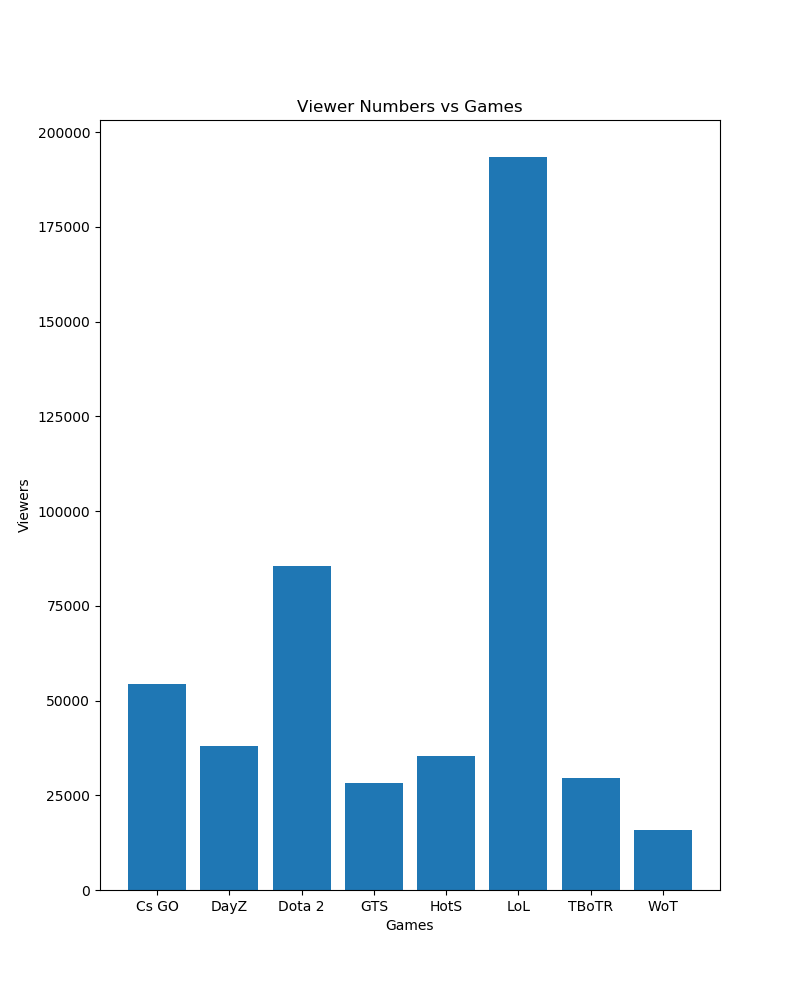

In [132]:
x_axis = df_games_viewers.game
y_axis = df_games_viewers.Viewers

fig = plt.figure(figsize = (8,10))
ax = plt.subplot()
plt.bar(range(len(y_axis)),y_axis)

ax.set_xticks(range(len(x_axis)))
ax.set_xticklabels(x_axis)
plt.title("Viewer Numbers vs Games")
plt.xlabel("Games")
plt.ylabel("Viewers")

plt.show()

<IPython.core.display.Javascript object>


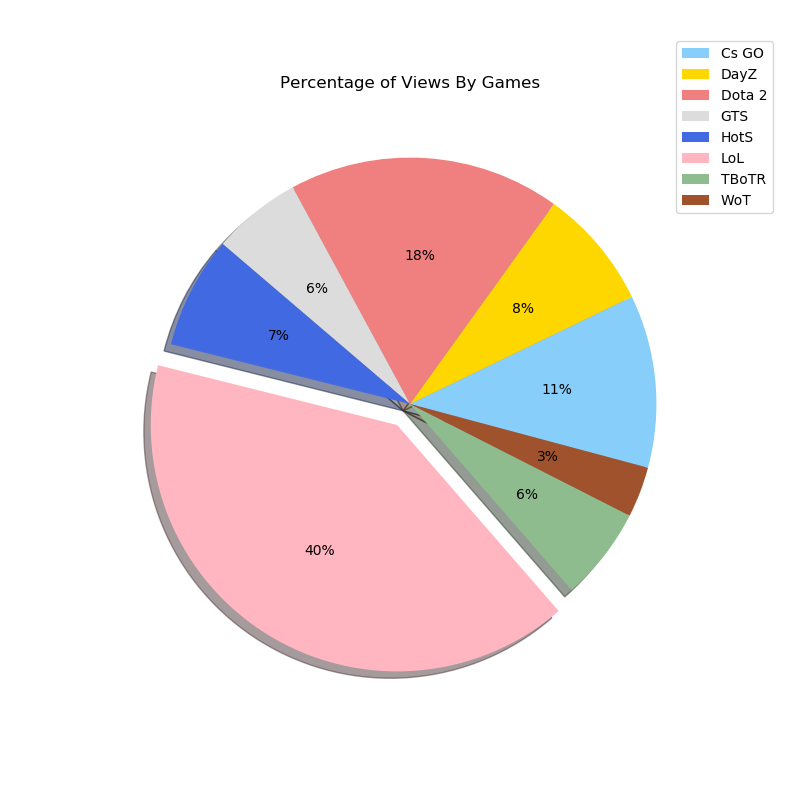

In [134]:
fig2 = plt.figure(figsize = (8,8))
ax = plt.subplot()
colors = ['lightskyblue', 'gold', 'lightcoral', 'gainsboro', 'royalblue', 'lightpink', 'darkseagreen','sienna']
explode = (0, 0, 0, 0, 0, 0.1, 0, 0)
plt.pie(y_axis,autopct='%1.0f%%',shadow = True,explode = explode,colors =colors,startangle=345)
plt.legend(x_axis, loc= "upper right", bbox_to_anchor=(1.1,1.1))
plt.title("Percentage of Views By Games")
plt.show()